In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

In [2]:
data = pd.read_csv('/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [3]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Checking for Null Values

In [4]:
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

# Exploratory Data Analysis (EDA)

**Distribution of Classes**

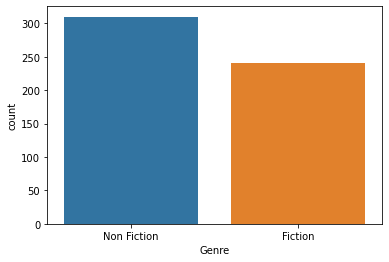

In [5]:
sns.countplot('Genre',data=data)

**Correlation Matrix**

In [6]:
corr = data.corr()
corr

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


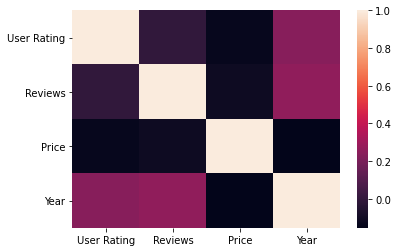

In [7]:
sns.heatmap(corr)

**Scatter Plot of Price and Reviews (For Fiction and Non-Fiction Books)**

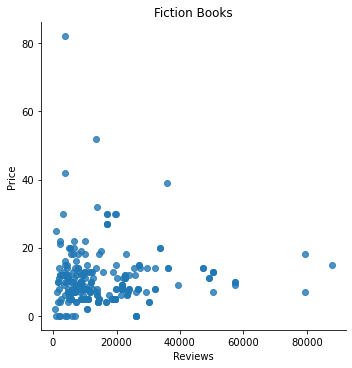

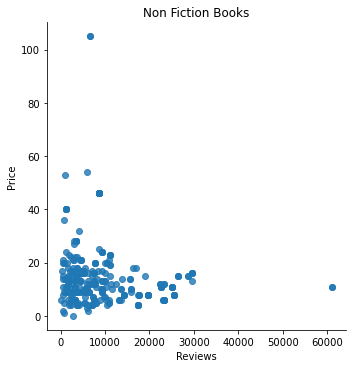

In [8]:
for genre in ['Fiction','Non Fiction']:
    temp_fiction = data[data['Genre']==genre]
    sns.lmplot(x='Reviews',y='Price',data=temp_fiction, fit_reg=False)
    plt.title('{} Books'.format(genre))
    plt.xlabel('Reviews')
    plt.ylabel('Price')
    plt.show()

**Average Rating of BestSeller Books (For Fiction and Non-Fiction Books)**

In [9]:
temp = data[data['Genre']=='Fiction']
years =  sorted(temp['Year'].unique().tolist())
mean_rating = pd.DataFrame([], columns=['Year','Rating','Genre'])
for index, year in enumerate(years):
    
    fn_temp = data[(data['Genre']=='Fiction') & (data['Year'] == year)]
    fn_rating = fn_temp['User Rating'].mean()
    nfn_temp = data[(data['Genre'] == 'Non Fiction') & (data['Year'] == year)]
    nfn_rating = nfn_temp['User Rating'].mean()
    temp_fn = {'Year':year,'Rating':fn_rating,'Genre':'Fiction'}
    temp_nfn = {'Year':year, 'Rating':nfn_rating,'Genre':'Non_Fiction'}
    mean_rating = mean_rating.append(temp_fn, ignore_index = True)
    mean_rating = mean_rating.append(temp_nfn, ignore_index = True)
mean_rating

,Year,Rating,Genre
0,2009,4.591667,Fiction
1,2009,4.576923,Non_Fiction
2,2010,4.615000,Fiction
3,2010,4.520000,Non_Fiction
4,2011,4.619048,Fiction
5,2011,4.513793,Non_Fiction
6,2012,4.495238,Fiction
7,2012,4.558621,Non_Fiction
8,2013,4.545833,Fiction
9,2013,4.561538,Non_Fiction


Text(0.5, 1.0, 'Average Rating Per Year (Genre Wise)')

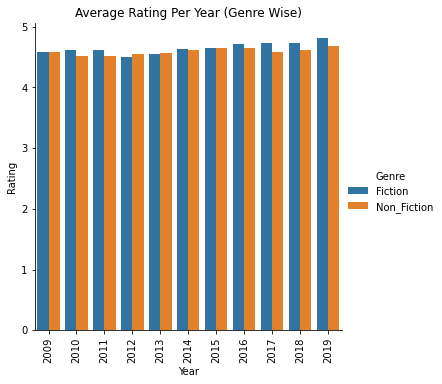

In [10]:
sns.catplot(x='Year', y='Rating', hue='Genre', data=mean_rating, kind='bar')
plt.xticks(rotation=90)
plt.title('Average Rating Per Year (Genre Wise)')


Top 10 Author with Books of Maximum Price

In [11]:
author_price = pd.DataFrame([],columns=['Author','Mean Price'])
authors = data['Author'].unique()
for index, author in enumerate(authors):
    author_data = data[data['Author']==author]
    mean_price = author_data['Price'].mean()
    author_price.loc[index] = [author,mean_price]
author_price =  author_price.sort_values('Mean Price', ascending=False).iloc[:10,:]
author_price

,Author,Mean Price
49,American Psychiatric Association,105.000000
83,Lin-Manuel Miranda,54.000000
168,Bill Simmons,53.000000
139,American Psychological Association,46.000000
232,Alan Moore,42.000000
203,The College Board,39.333333
162,Paulo Coelho,39.000000
85,J. K. Rowling,35.000000
10,Jaycee Dugard,32.000000
36,Thomas Piketty,28.000000


Text(0.5, 1.0, 'Authors with Books of Maximum Price')

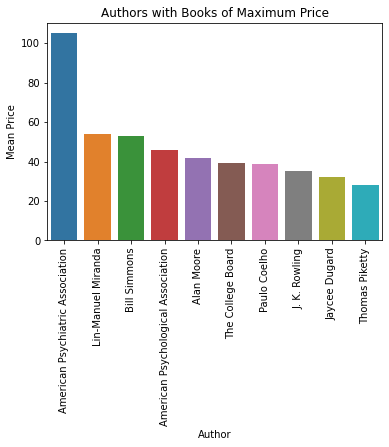

In [12]:
sns.barplot(x = 'Author', y ='Mean Price',data= author_price)
plt.xticks(rotation=90)
plt.title('Authors with Books of Maximum Price')

**Histogram of Reviews and Price**

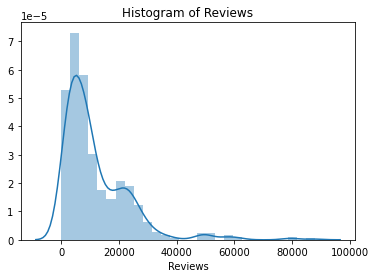

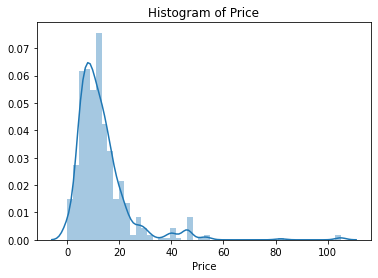

In [13]:
for feature in ['Reviews','Price']:
    sns.distplot(data[feature])
    plt.title('Histogram of {}'.format(feature))
    plt.show()

**Top 10 Authors with Max BestSeller Books**

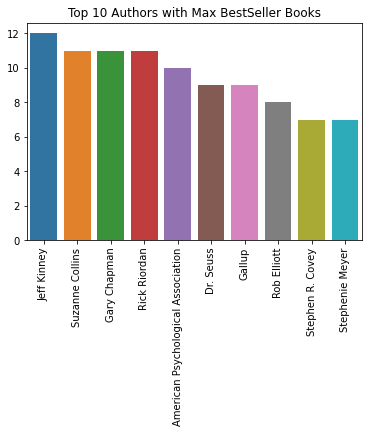

In [14]:
sns.barplot(x = data['Author'].value_counts().head(10).index,y = data['Author'].value_counts().head(10).values,data=data)
plt.xticks(rotation=90)
plt.title('Top 10 Authors with Max BestSeller Books')
plt.show()

# Genre Prediction

In [15]:
y = data.Genre

In [16]:
X = data.drop(columns=['Name','Author','Genre'])

In [17]:
def clean(x):
    x = re.sub('[^A-z\s]','',x)
    return x.lower()

In [18]:
import re
text = data.Name.apply(lambda x: clean(x)) 

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500,max_df=0.6,min_df=1)
text_num = tfidfconverter.fit_transform(text).toarray()

In [20]:
x = np.concatenate((text_num,X),axis=1)
print('Shape of input features {}'.format(x.shape))

Shape of input features (550, 1154)


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [22]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
y = label_encoder.fit_transform(y)

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2)

# Initializing Models

In [24]:
from sklearn.svm import SVC
svc_clf = SVC(C=1.0,gamma='auto')

In [25]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()

In [26]:
from sklearn.ensemble import AdaBoostClassifier
ab_clf = AdaBoostClassifier(n_estimators=200,learning_rate=0.1)

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1)

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

In [29]:
from sklearn.linear_model import RidgeClassifier
rg_clf = RidgeClassifier(alpha=1.0, class_weight='balanced')


In [30]:
from sklearn.linear_model import RidgeClassifierCV
rgcv_clf = RidgeClassifierCV(cv=10)
# rgcv_clf.fit(xtrain,ytrain)

In [31]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
# clf.fit(xtrain,ytrain)

In [32]:
from catboost import CatBoostClassifier
cb_clf = CatBoostClassifier(learning_rate = 0.001,iterations = 2,verbose=False)

In [33]:
from sklearn.metrics import accuracy_score, f1_score
def metrics(ytest,ypred):
    accuracy = accuracy_score(ytest,ypred)
    harmonic_mean = f1_score(ytest,ypred)
    return accuracy, harmonic_mean

# Get Result of all Models

In [34]:
from sklearn.model_selection import cross_val_score
models = [svc_clf, lr_clf, ab_clf, gb_clf, dt_clf,rg_clf, rgcv_clf, gnb_clf,cb_clf] 
result = pd.DataFrame([],columns=['Model','Accuracy','F1 Score','CV_Accuracy'])


In [35]:
def get_model_result(model, model_id, cv_unit):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    accuracy, f1_score = metrics(ytest,ypred)
    cv_accuracy = cross_val_score(model, xtrain, ytrain, scoring='accuracy', cv=cv_unit)
    result.loc[model_id] = [str(model),accuracy, f1_score, cv_accuracy.mean()]
    

In [36]:
for model_id, model in enumerate(models):
    get_model_result(model, model_id, cv_unit=10)
    
result

,Model,Accuracy,F1 Score,CV_Accuracy
0,SVC(gamma='auto'),0.845455,0.870229,0.865909
1,LogisticRegression(),0.927273,0.934426,0.915909
2,"AdaBoostClassifier(learning_rate=0.1, n_estima...",0.863636,0.873950,0.870455
3,GradientBoostingClassifier(n_estimators=200),0.872727,0.885246,0.890909
4,DecisionTreeClassifier(),0.836364,0.857143,0.852273
5,RidgeClassifier(class_weight='balanced'),0.909091,0.915254,0.902273
6,"RidgeClassifierCV(alphas=array([ 0.1, 1. , 10...",0.927273,0.932203,0.913636
7,GaussianNB(),0.890909,0.903226,0.884091
8,<catboost.core.CatBoostClassifier object at 0x...,0.745455,0.770492,0.756818


# StackingCV Classifier

In [37]:
from mlxtend.classifier import StackingCVClassifier
stack_gen = StackingCVClassifier(classifiers=models,
                                meta_classifier=lr_clf,
                                use_features_in_secondary=True,cv=10)
stack_gen.fit(np.array(xtrain),np.array(ytrain))
ypred = stack_gen.predict(np.array(xtest))



In [38]:
accuracy, f1_score_value = metrics(ytest,ypred)
print('StackingCV Accuracy {} and F1 Score {}'.format(accuracy,f1_score_value))

StackingCV Accuracy 0.9363636363636364 and F1 Score 0.9421487603305785
